In [1]:
from djccx.frd.readfrd import readfrd
import os,glob

In [2]:
from matplotlib import pyplot as plt

In [3]:
frds_files = glob.glob("*/*/*.frd")

In [4]:
frds_files.sort()

In [5]:

def localread(x):

    try:
        return readfrd(x)
    except:
        return 0
ifrds = [ localread(ifr) for ifr in frds_files ]

In [6]:
import numpy as np

F3 3536.573004004682
F3 2532.4442315705955
F3 2340.186797519485
F3 2381.136799954356
F3 3473.2255883077705
F3 3676.211039961555


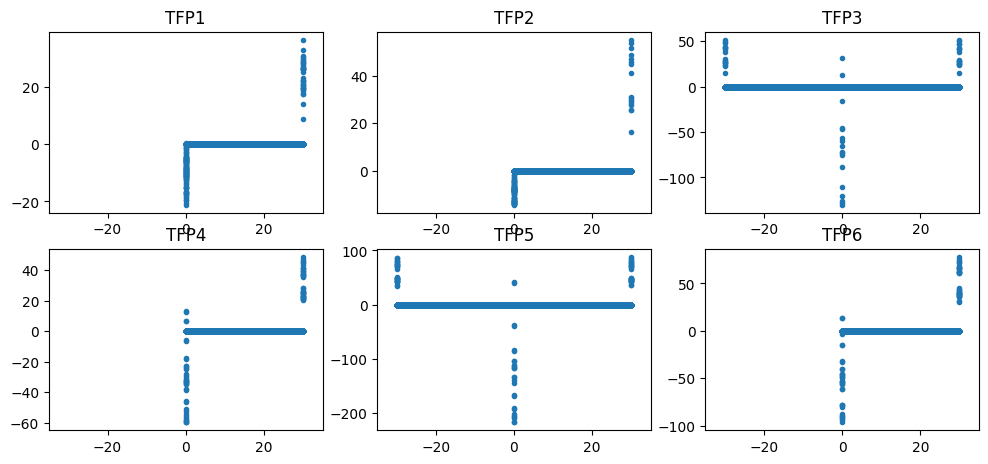

In [7]:
fig = plt.figure(figsize=(12,8))
F3_span = []
factor = [ 4,4,2,2,1,2]
tt = []
for j,ifr in enumerate(ifrds):
    plt.subplot(3,3,j+1)
    data = ifr["data"]
    plt.plot(data["x"], data["F3"],".")
    plt.xlim(-35,35)
    plt.title("TFP" + str(j+1))

    # select x>-10 and x<10
    F3 = data["F3"][data["x"]>-10]
    F3 = F3[data["x"]<10]
    F3 = - np.sum(F3)*factor[j]
    print("F3",F3)
    F3_span.append(F3)

    ti = np.max(data["z"]) - np.min(data["z"])
    tt.append(ti)

In [8]:
F3_span = np.array(F3_span)
tt = np.array(tt)

In [9]:
P = F3_span
B = 25
L = 60
U = 5
Eflex = (P*L**3)/(4*U*B*tt**3) * 1e-3

In [10]:
import pandas as pd

In [11]:
df_pred_file = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred_file = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred = pd.read_csv(df_pred_file)

In [12]:
Eb_pred = df_pred["Eb [GPa]"]

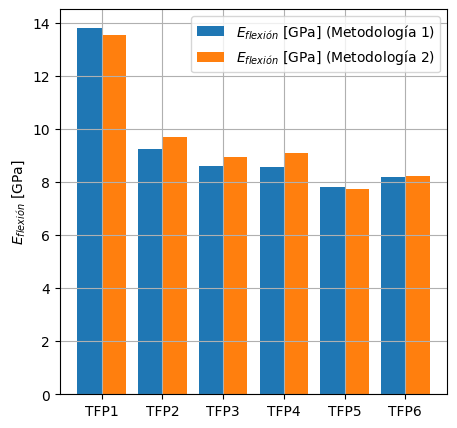

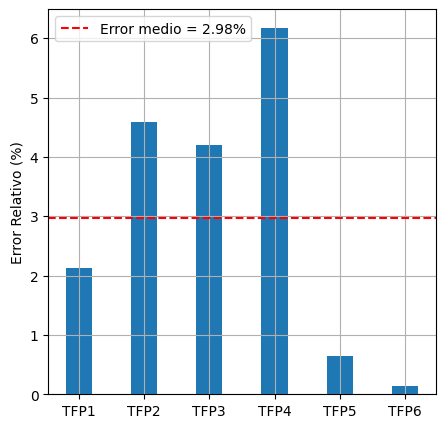

In [13]:
# bar plot 
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
fig = plt.figure(figsize=(5,5))
xp = np.arange(len(Eb_pred))
plt.bar(xp, Eb_pred, width=0.4, label=r"$E_{flexión}$ [GPa] (Metodología 1)")
plt.bar(xp+0.4, Eflex, width=0.4, label="$E_{flexión}$ [GPa] (Metodología 2)")
plt.ylabel("$E_{flexión}$ [GPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

fig = plt.figure(figsize=(5,5))
error_abs = np.abs(Eb_pred - Eflex)
error_rel = np.abs((Eb_pred - Eflex)/Eb_pred)*100
error_mu = np.mean(error_rel)
plt.bar(xp, error_rel, width=0.4)
# line 
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()



Text(0, 0.5, '$E_{flexión}$ [GPa] (Metodología 2)')

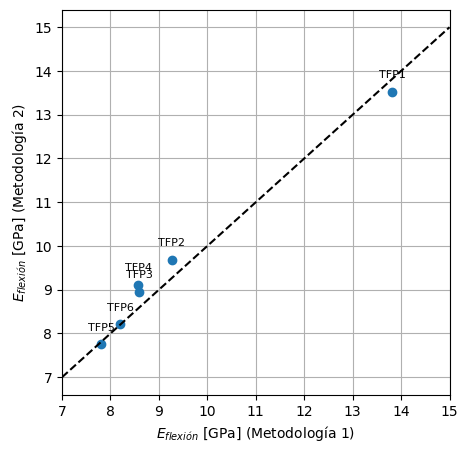

In [14]:

# vs 
fig = plt.figure(figsize=(5,5))
plt.plot(Eb_pred, Eflex, "o")
plt.plot([7, 15], [7, 15], "k--")
plt.xlim(7, 15)

for i in range(len(Eb_pred)):
    plt.annotate("TFP" + str(i+1), (Eb_pred[i], Eflex[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.grid()

plt.xlabel("$E_{flexión}$ [GPa] (Metodología 1)")
plt.ylabel("$E_{flexión}$ [GPa] (Metodología 2)")


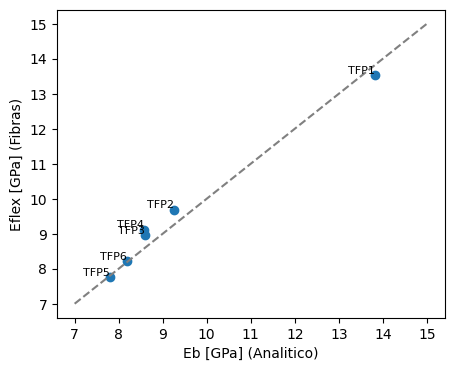

In [15]:
#plot vs 
plt.figure(figsize=(5,4))
plt.plot(Eb_pred, Eflex, "o")
plt.xlabel("Eb [GPa] (Analitico)")
plt.ylabel("Eflex [GPa] (Fibras)")
#1:1 line
x = np.linspace(7, 15, 100)
plt.plot(x, x, "--", color="gray")

# text 
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (Eb_pred[i], Eflex[i]), fontsize=8, ha='right', va='bottom')

In [16]:
from validation.FullExperimental import FullExperimental
df = FullExperimental()
Eb_expiremental = df["Eb [GPa]"]["mean"].values
Eb_expiremental

array([13.20105043,  9.86950067,  9.22200343, 10.18181529,  6.14310539,
        7.79805989])

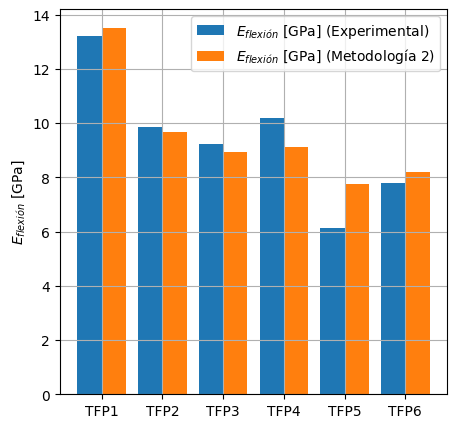

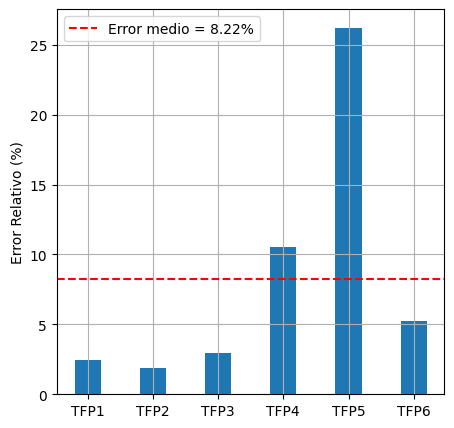

In [17]:
# bar plot 
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
fig = plt.figure(figsize=(5,5))
xp = np.arange(len(Eb_expiremental))
plt.bar(xp, Eb_expiremental, width=0.4, label=r"$E_{flexión}$ [GPa] (Experimental)")
plt.bar(xp+0.4, Eflex, width=0.4, label="$E_{flexión}$ [GPa] (Metodología 2)")
plt.ylabel("$E_{flexión}$ [GPa]")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

fig = plt.figure(figsize=(5,5))
error_abs = np.abs(Eb_expiremental - Eflex)
error_rel = np.abs((Eb_expiremental - Eflex)/Eb_expiremental)*100
error_mu = np.mean(error_rel)
plt.bar(xp, error_rel, width=0.4)
# line 
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()



In [18]:
df_results = pd.DataFrame({
        "Eflex [GPa] (Fibras)": Eflex,

        "Eflex [GPa] (Experimental)": Eb_expiremental,
    "Error Absoluto (GPa)": error_abs,
    "Error Relativo (%)": error_rel
})
df_results.round(3)

,Eflex [GPa] (Fibras),Eflex [GPa] (Experimental),Error Absoluto (GPa),Error Relativo (%)
0,13.525,13.201,0.324,2.456
1,9.685,9.870,0.184,1.868
2,8.950,9.222,0.272,2.951
3,9.106,10.182,1.075,10.562
4,7.754,6.143,1.611,26.225
5,8.207,7.798,0.409,5.248


In [19]:
P1_json_files = glob.glob("*/*.json")
P1_json_files.sort()

In [20]:
from loadsavejson.loadjson import loadjson

In [21]:
P1_json_files

['TPF1/P1.json',
 'TPF2/P1.json',
 'TPF3/P1.json',
 'TPF4/P1.json',
 'TPF5/P1.json',
 'TPF6/P1.json']

In [62]:
P1_json = [ loadjson(x) for x in P1_json_files ]

In [63]:
positions = [ x["position"] for x in P1_json ]

In [64]:
positions = np.array(positions)
positions

array([[ 0.694444  ,  0.95056   , -2.35763   ],
       [ 1.73611   ,  4.16667   , -1.88262   ],
       [-1.23274   ,  4.37334   , -1.88262   ],
       [ 0.291787  , -1.96084   , -2.2287    ],
       [-0.00939366, -2.02722   , -2.6545    ],
       [ 0.267831  , -1.85852   , -2.6545    ]])

Text(0.5, 1.0, 'Posiciones de las maximos  de la resina')

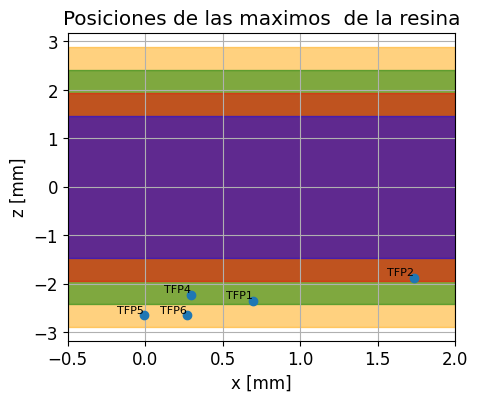

In [65]:
# plot x,z 
tn  = 2.934
tl = 0.475

fig = plt.figure(figsize=(5,4))
plt.plot(positions[:,0], positions[:,2], "o")
#draw tn/2 line and -tn/2 line
# plt.axhline(tn/2, color="black", linestyle="--")
# plt.axhline(-tn/2, color="black", linestyle="--")
# plt.axhline(tn/2+tl, color="blue", linestyle="--")
# plt.axhline(-tn/2-tl, color="blue", linestyle="--")

# plt.axhline(tn/2+2*tl, color="red", linestyle="--")
# plt.axhline(-tn/2-2*tl, color="red", linestyle="--")

# plt.axhline(tn/2+3*tl, color="g", linestyle="--")
# plt.axhline(-tn/2-3*tl, color="g", linestyle="--")

# rectangle 
plt.fill_betweenx([-tn/2-3*tl, tn/2+3*tl], -0.5, 2, color="orange", alpha=0.5)
plt.fill_betweenx([-tn/2-2*tl, tn/2+2*tl], -0.5, 2, color="g", alpha=0.5)
plt.fill_betweenx([-tn/2-tl, tn/2+tl], -0.5, 2, color="r", alpha=0.5)
plt.fill_betweenx([-tn/2, tn/2], -0.5, 2, color="blue", alpha=0.5)

plt.grid()
plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (positions[i,0], positions[i,2]), fontsize=8, ha='right', va='bottom')

plt.xlim(-0.5,2)
plt.title("Posiciones de las maximos  de la resina")

In [66]:
Sfibre = 1243.05186
# Sfibre = 300

Smatrix = 620.94557
# Smatrix = 200

P1_max = [ x["P1_max"] for x in P1_json ]
P1_max = np.array(P1_max)

P1_resina = [ x["P1_max_resina"] for x in P1_json ]
P1_resina = [ x["P1_max_resina_list"][0] for x in P1_json ]
sigma_exp = (3/2)*F3_span*L/(B*tt**2)

In [67]:
K_fibra = P1_max/sigma_exp
K_resina = P1_resina/sigma_exp

S_TPFi = [ np.min([Sfibre/K_fibra[i], Smatrix/K_resina[i]]) 
          for i in range(len(K_fibra)) ]
S_TPFi = np.array(S_TPFi)
S_TPFi_old = S_TPFi.copy()

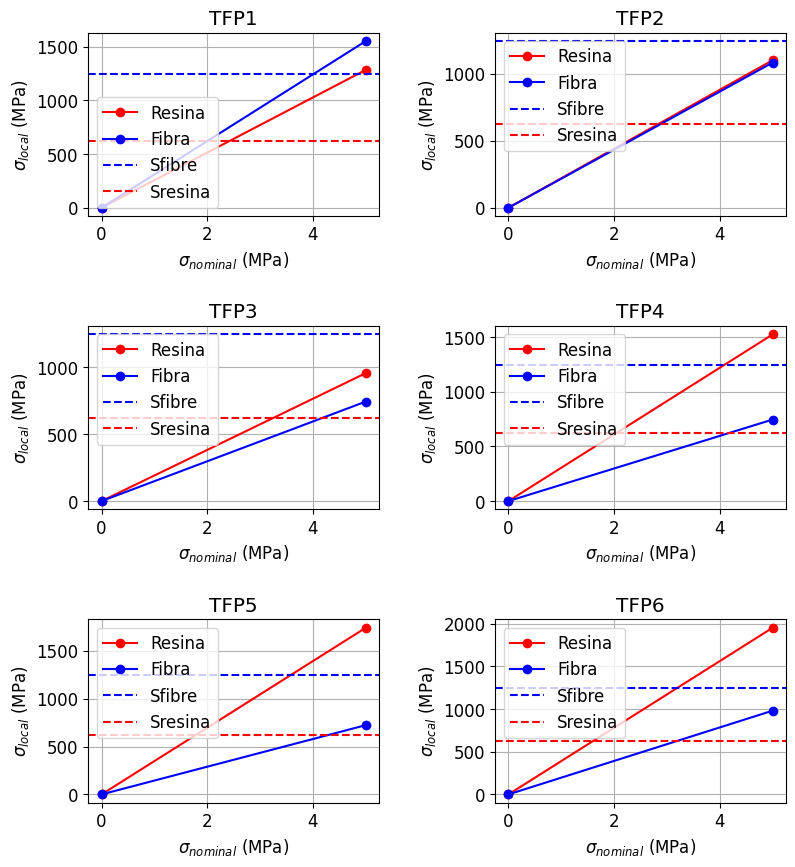

In [68]:
fig = plt.figure(figsize=(9,10))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(6):

    plt.subplot(3,2,i+1)
    # plt.plot([0,sigma_exp[i]], [0,P1_resina[i]], "o-", label="Resina",color="r")
    # plt.plot([0,sigma_exp[i]], [0,P1_max[i]], "o-", label="Fibra",color="b")

    plt.plot([0,5], [0,P1_resina[i]], "o-", label="Resina",color="r")
    plt.plot([0,5], [0,P1_max[i]], "o-", label="Fibra",color="b")
    # horizontal line
    plt.axhline(y=Sfibre, linestyle='--', label="Sfibre",color="b")
    plt.axhline(y=Smatrix, linestyle='--', label="Sresina",color="r")

    # vertical line
    # plt.axvline(x=S_TPFi[i], linestyle='--', color="gray",label = "Predicción")
    # fill 
    plt.ylabel(r"$\sigma_{local}$ (MPa)")

    
    plt.xlabel(r"$\sigma_{nominal}$ (MPa)")
    plt.grid()
    plt.title("TFP" + str(i+1))
    # plt.ylim(0, 1500)
    # plt.xlim(0, 600)
    plt.legend()

In [69]:
from validation.FullExperimental import FullExperimental
df = FullExperimental()
Sb_expiremental = df["Sb [MPa]"]["mean"].values
Sb_expiremental

array([134.99666667, 117.43      , 128.05333333, 141.70333333,
       107.43333333, 114.30666667])

In [70]:
def PredFEM(Sfibre,Smatrix):
    K_fibra = P1_max/sigma_exp
    K_resina = P1_resina/sigma_exp

    S_TPFi = [ np.min([Sfibre/K_fibra[i], Smatrix/K_resina[i]]) 
            for i in range(len(K_fibra)) ]
    S_TPFi = np.array(S_TPFi)

    return S_TPFi


In [71]:
S_TPFi = PredFEM(Sfibre, Smatrix)
S_TPFi

array([263.63944129, 220.17081047, 234.60617836, 149.29856035,
       133.22645321, 125.73910677])

In [72]:
#find P1_max_opt, P1_resina_opt
def find_optimal_P1(Sfibre, Smatrix):
    S_TPFi = PredFEM(Sfibre, Smatrix)

    dx = (Smatrix-Sfibre)
    return np.abs((S_TPFi - Sb_expiremental)**2).sum() + 1e2*np.max([0,dx])**2  + 1e-2*(Sfibre - 1212.425)**2

from scipy.optimize import minimize

x0 = np.array([0,1])
x0 = np.array([1212.425,620.94])
# Sfibre,Smatrix

res_final = minimize(lambda x: find_optimal_P1(x[0], x[1]),
                        x0,
                        method='Nelder-Mead',
                        options={'xatol': 1e-8, 'disp': False})
print("Initial guess:", x0)
print("Minimization result:", res_final.fun)
print("Optimal Sfibre:", res_final.x[0], "Smatrix:", res_final.x[1])
for iter in range(200):
    x0 = np.array([1212.425,620.94]) + (np.random.randn()) * 400 * 2
    print("\nIteration", iter+1, "with initial guess:", x0)

    res = minimize(lambda x: find_optimal_P1(x[0], x[1]),
                        x0,
                        method='Nelder-Mead',
                        options={'xatol': 1e-8, 'disp': False})
    print("Minimization result:", res.fun ,"at", res.x)

    if res.fun < res_final.fun:
        res_final = res
        print("New best result found:", res.fun, "at", res.x)
        print("Sfibre_opt:", res.x[0], "Smatrix_opt:", res.x[1])
    else:
        print("No improvement found.")

# global optimization by basinhoppin
res = res_final

Initial guess: [1212.425  620.94 ]
Minimization result: 5827.720692395022
Optimal Sfibre: 1212.4249957604234 Smatrix: 383.43782750175245

Iteration 1 with initial guess: [  65.47410756 -526.01089244]
Minimization result: 5827.720692395021 at [1212.42500137  383.43782925]
New best result found: 5827.720692395021 at [1212.42500137  383.43782925]
Sfibre_opt: 1212.4250013689862 Smatrix_opt: 383.43782924592836

Iteration 2 with initial guess: [2139.06628103 1547.58128103]
Minimization result: 5827.720692395021 at [1212.42499397  383.43782783]
No improvement found.

Iteration 3 with initial guess: [-235.00464429 -826.48964429]
Minimization result: 5827.720692395021 at [1212.42500345  383.4378285 ]
No improvement found.

Iteration 4 with initial guess: [2005.07407184 1413.58907184]
Minimization result: 5827.720692395021 at [1212.42500139  383.43782809]
No improvement found.

Iteration 5 with initial guess: [1568.14964218  976.66464218]
Minimization result: 5827.720692395021 at [1212.42500326 

In [73]:
P1_fibra_opt = res.x[0]
P1_resina_opt = res.x[1]
print("P1_fibra_opt",P1_fibra_opt)
print("P1_resina_opt",P1_resina_opt)

P1_fibra_opt 1212.4249972254397
P1_resina_opt 383.43782806918125


In [74]:
S_TPFi_opt = PredFEM(P1_fibra_opt, P1_resina_opt)


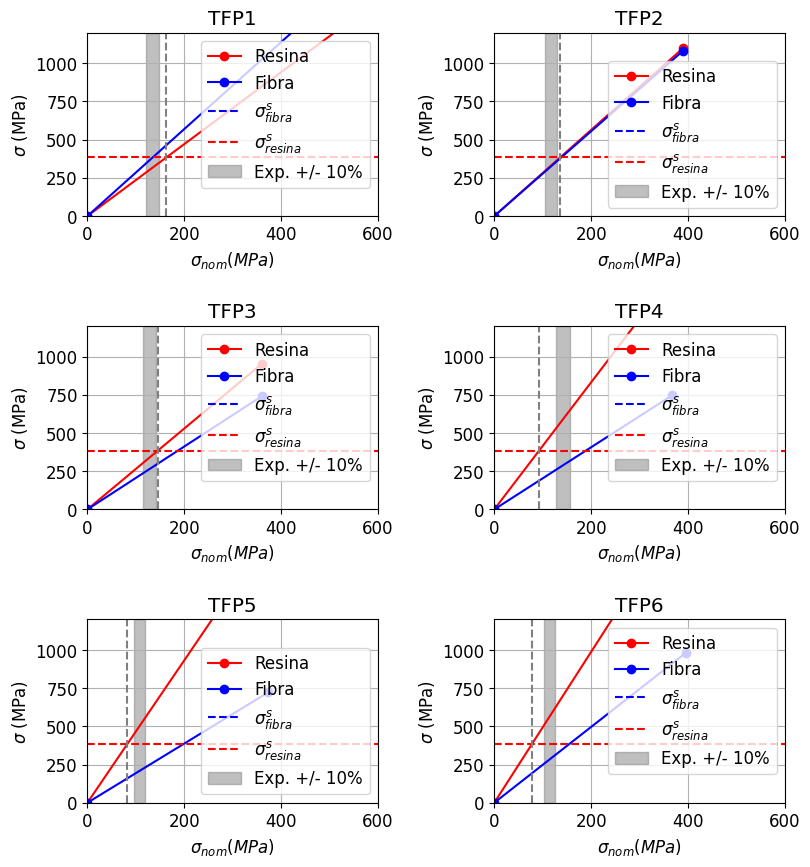

In [75]:
fig = plt.figure(figsize=(9,10))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(6):

    plt.subplot(3,2,i+1)
    plt.plot([0,sigma_exp[i]], [0,P1_resina[i]], "o-", label="Resina",color="r")
    plt.plot([0,sigma_exp[i]], [0,P1_max[i]], "o-", label="Fibra",color="b")
    # horizontal line
    plt.axhline(y=P1_fibra_opt, linestyle='--', label="$\sigma_{fibra}^s$",
                color="b")
    plt.axhline(y=P1_resina_opt, linestyle='--', label="$\sigma_{resina}^s$",
                color="r")

    # experimental vertical line
    # 10% rectangle vertical line
    plt.fill_betweenx([0, 1200], 
                      Sb_expiremental[i]-Sb_expiremental[i]*0.1, 
                      Sb_expiremental[i]+Sb_expiremental[i]*0.1, 
                      color="gray", alpha=0.5,label= "Exp. +/- 10%")
    
    # vertical line
    plt.axvline(x=S_TPFi_opt[i], linestyle='--', color="gray")
    plt.ylabel(r"$\sigma$ (MPa)")
    plt.xlabel(r"$\sigma_{nom} (MPa)$")
    plt.grid()
    plt.title("TFP" + str(i+1))
    plt.ylim(0, 1200)
    plt.xlim(0, 600)
    plt.legend()

In [76]:
df_pred_an_file = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
df_pred_an_file = "../../01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred_an = pd.read_csv(df_pred_an_file)

In [77]:
Sb = df_pred_an["Sb [MPa]"]


([<matplotlib.axis.XTick at 0x7f3eb6646010>,
 [Text(0.2, 0, 'TFP1'),
  Text(1.2, 0, 'TFP2'),
  Text(2.2, 0, 'TFP3'),
  Text(3.2, 0, 'TFP4'),
  Text(4.2, 0, 'TFP5'),
  Text(5.2, 0, 'TFP6')])

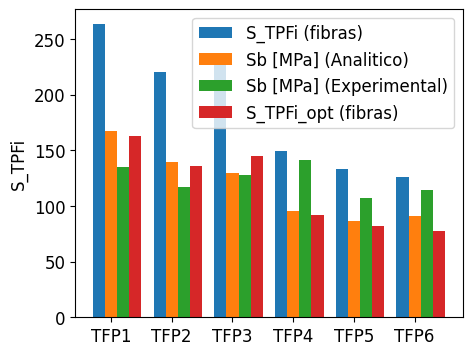

In [78]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,4))
xp = np.arange(len(S_TPFi))
plt.bar(xp, S_TPFi, width=0.2, label="S_TPFi (fibras)")
plt.bar(xp+0.2, Sb, width=0.2, label="Sb [MPa] (Analitico)")
plt.bar(xp+0.4, Sb_expiremental, width=0.2, label="Sb [MPa] (Experimental)")
plt.bar(xp+0.6, S_TPFi_opt, width=0.2, label="S_TPFi_opt (fibras)")
plt.ylabel("S_TPFi")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])

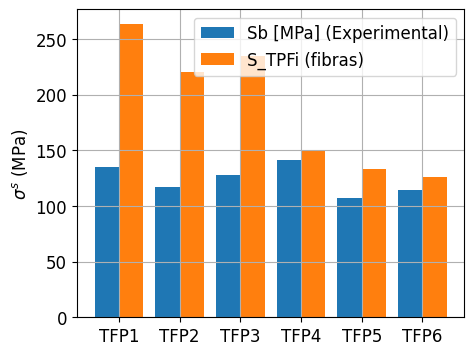

In [79]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,4))
xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb_expiremental, width=0.4, label="Sb [MPa] (Experimental)")
plt.bar(xp+0.2, S_TPFi, width=0.4, label="S_TPFi (fibras)")
plt.ylabel(r"$\sigma^s$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
# plt.ylim(0,580)
# MPa 


(0.0, 180.0)

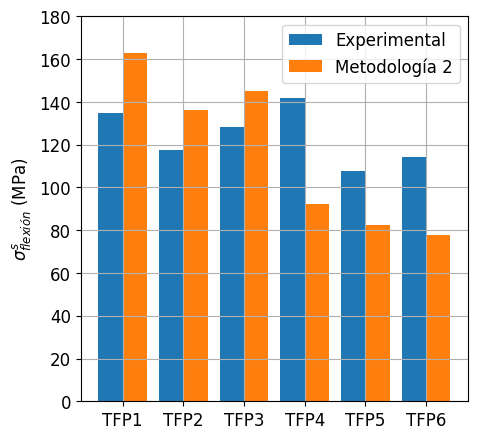

In [80]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 12})

xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb_expiremental, width=0.4, label="Experimental")
plt.bar(xp+0.2, S_TPFi_opt, width=0.4, label="Metodología 2")
plt.ylabel(r"$\sigma^s_{flexión}$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
plt.ylim(0,180)

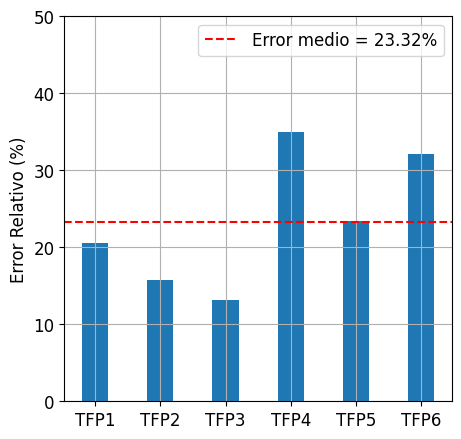

In [81]:


error_abs = np.abs(S_TPFi_opt - Sb_expiremental)
error_rel = np.abs((S_TPFi_opt - Sb_expiremental)/Sb_expiremental)*100

error_mu = np.mean(error_rel)

fig = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 12})
plt.bar(xp, error_rel, width=0.4)
# line
plt.axhline(y=error_mu, color='r', linestyle='--', label="Error medio = %.2f" % error_mu + "%")
plt.ylabel("Error Relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.ylim(0, 50)
plt.grid()

In [42]:
df_results = pd.DataFrame({
    "Sn pred [MPa] (Fibras)": S_TPFi_opt,
    "Sb [MPa] (Experimental)": Sb_expiremental,

    "Error Absoluto (GPa)": error_abs,
    "Error Relativo (%)": error_rel
})

In [43]:
df_results.round(3)

,Sn pred [MPa] (Fibras),Sb [MPa] (Experimental),Error Absoluto (GPa),Error Relativo (%)
0,162.799,134.997,27.802,20.595
1,135.957,117.430,18.527,15.777
2,144.871,128.053,16.817,13.133
3,92.193,141.703,49.511,34.940
4,82.268,107.433,25.165,23.424
5,77.645,114.307,36.662,32.073


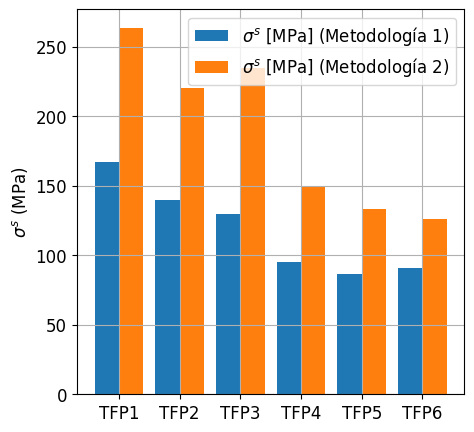

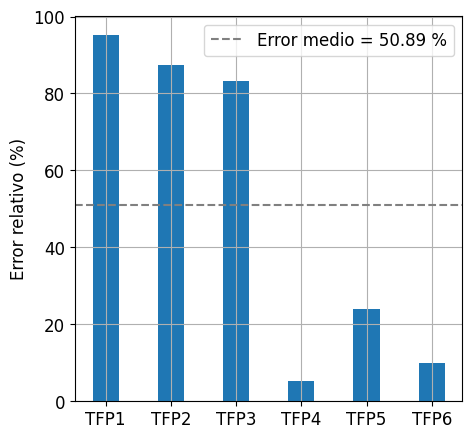

In [44]:
#bar plot 
lables = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]

fig = plt.figure(figsize=(5,5))
xp = np.arange(len(S_TPFi))
plt.bar(xp-0.2, Sb, width=0.4, label=r"$\sigma^s$ [MPa] (Metodología 1)")
plt.bar(xp+0.2, S_TPFi, width=0.4, label="$\sigma^s$ [MPa] (Metodología 2)")
plt.ylabel(r"$\sigma^s$ (MPa)")
plt.legend()
# TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.grid()
#
# plt.ylim(0,180)

fig = plt.figure(figsize=(5,5))
error = np.abs(S_TPFi - Sb_expiremental)
error_relative = error/Sb_expiremental*100
error_mu = np.mean(error_relative)
plt.bar(xp, error_relative, width=0.4)
plt.ylabel("Error relativo (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.axhline(y=error_mu, linestyle='--', color="gray", label="Error medio = %.2f" % error_mu + " %")
plt.legend()
plt.grid()

Text(0, 0.5, '$\\sigma^s$ [MPa] (Metodología 2)')

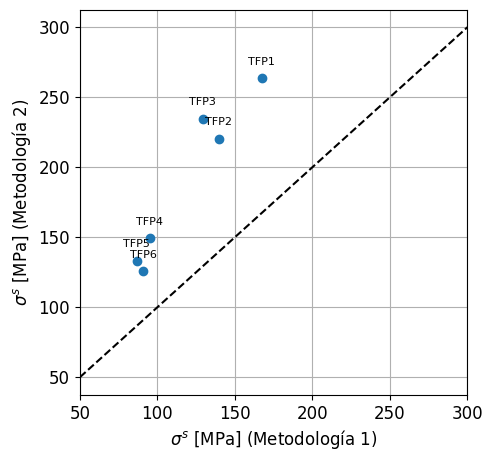

In [45]:
# vs 
fig = plt.figure(figsize=(5,5))
plt.plot(Sb,S_TPFi, "o")
plt.plot([50, 300], [50, 300], "k--")
plt.xlim(50, 300)
for i in range(len(S_TPFi)):
    plt.annotate("TFP" + str(i+1), ( Sb[i],S_TPFi[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.grid()
plt.xlabel(r"$\sigma^s$ [MPa] (Metodología 1)")
plt.ylabel(r"$\sigma^s$ [MPa] (Metodología 2)")

(0.0, 30.0)

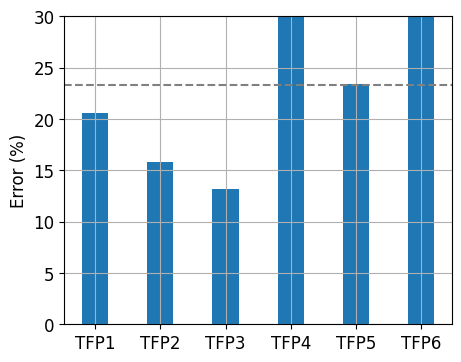

In [46]:
# error 
error = np.abs(S_TPFi_opt - Sb_expiremental)/Sb_expiremental*100
fig = plt.figure(figsize=(5,4))
plt.bar(xp, error, width=0.4, label="Error (%)");
plt.ylabel("Error (%)")
plt.xticks(xp, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]);
error_mean = np.mean(error)
error_std = np.std(error)
plt.axhline(y=error_mean, linestyle='--', color="gray")
plt.grid()
plt.ylim(0, 30)

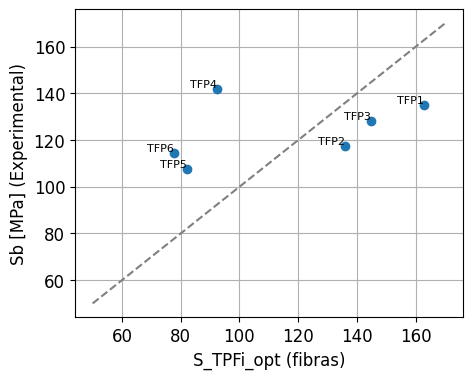

In [47]:
# fibras 
# 1 vs 1 
fig = plt.figure(figsize=(5,4))
# STPFi vs Sb_exp
plt.plot(S_TPFi_opt, Sb_expiremental, "o")
# 1:1 line
x = np.linspace(50,170, 100)
plt.plot(x, x, "--", color="gray")
plt.xlabel("S_TPFi_opt (fibras)")
plt.ylabel("Sb [MPa] (Experimental)")
plt.grid()
# text
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (S_TPFi_opt[i], Sb_expiremental[i]), 
                 fontsize=8, ha='right', va='bottom')

In [48]:
F3_span

array([3536.573004  , 2532.44423157, 2340.18679752, 2381.13679995,
       3473.22558831, 3676.21103996])

In [49]:
Force_multilayer_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_Modelo_MultiCapa\T02_NumericalModelNOPBC\output_force.csv"
Force_multilayer_path = "../../../scripts/T02_Modelo_MultiCapa/T02_NumericalModelNOPBC/output_force.csv"
Force_multilayer = pd.read_csv(Force_multilayer_path)
Force_multilayer = Force_multilayer["Force"].values

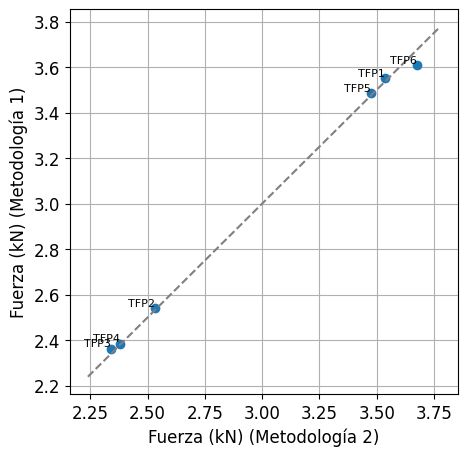

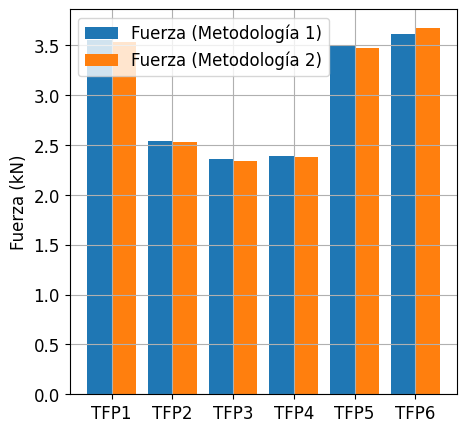

In [50]:
fig = plt.figure(figsize=(5,5))
plt.plot(1e-3*F3_span,
         1e-3*Force_multilayer, "o")
# 1vs 1 line
eps = 101e-3
x = np.linspace(min(1e-3*F3_span)-eps, 
                max(1e-3*F3_span)+eps, 100)
plt.plot(x, x, "--", color="gray")
# text TFP1, TFP2, TFP3, TFP4, TFP5, TFP6
for i, txt in enumerate(["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]):
    plt.annotate(txt, (1e-3*F3_span[i], 
                       1e-3*Force_multilayer[i]), fontsize=8, ha='right', va='bottom')

# force 
plt.xlabel("Fuerza (kN) (Metodología 2)")
plt.ylabel("Fuerza (kN) (Metodología 1)")
plt.grid()

fig = plt.figure(figsize=(5,5))
# bar plot
plt.bar(xp, 1e-3*Force_multilayer, width=0.4, label="Fuerza (Metodología 1)")

plt.bar(xp+0.4, 1e-3*F3_span, width=0.4, label="Fuerza (Metodología 2)")
plt.ylabel("Fuerza (kN)")
plt.xticks(xp+0.2, ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"])
plt.legend()
plt.grid()

In [51]:
summaries_multicapa_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts\T02_Modelo_MultiCapa\T02_NumericalModelNOPBC\summaries.json"
summaries_multicapa_path = "../../../scripts/T02_Modelo_MultiCapa/T02_NumericalModelNOPBC/summaries.json"
from loadsavejson.loadjson import loadjson

summaries_multicapa = loadjson(summaries_multicapa_path)
summaries_multicapa = summaries_multicapa["summaries"]

In [52]:
summaries_multicapa[0]

{'layers': ['Y', 'Y', 'nucleo', 'Y', 'Y'],
 'P1': [[0.0, 413.2557686907389, 826.511819911243],
  [0.0, 270.22531936034557, 540.450451351391],
  [0.0, 4.868031741125714, 9.736062196946502],
  [0.0, 56.637201305262465, 113.27447240935112],
  [0.0, -12.843371817091452, -25.68698981172429]],
 'F3': [-0.0, 1775.63158, 3551.2637799999998],
 'sigma_exp': [-0.0, 273.5533698089779, 547.1068351350052]}

In [53]:
layers = summaries_multicapa[0]["layers"]

In [54]:
st_df_path = "../../../scripts_finals/01_metodo/02_flexion/04_optim_stress/Sl.csv"
# st_df_path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\Sl.csv"
df_st = pd.read_csv(st_df_path)
df_st

,Unnamed: 0,0
0,S_fibra,1143.568989
1,S_matrix,620.945569
2,S_X,473.050228
3,S_SX,195.889232
4,S_Y,266.080492
5,S_SY,93.029122


In [55]:
St_layers = {
    "X"   : df_st.T[2].values[1],
    "SX"  : df_st.T[3].values[1],
    "Y"   : df_st.T[4].values[1],
    "SY"  : df_st.T[5].values[1],
    "nucleo" : 0.0,
}

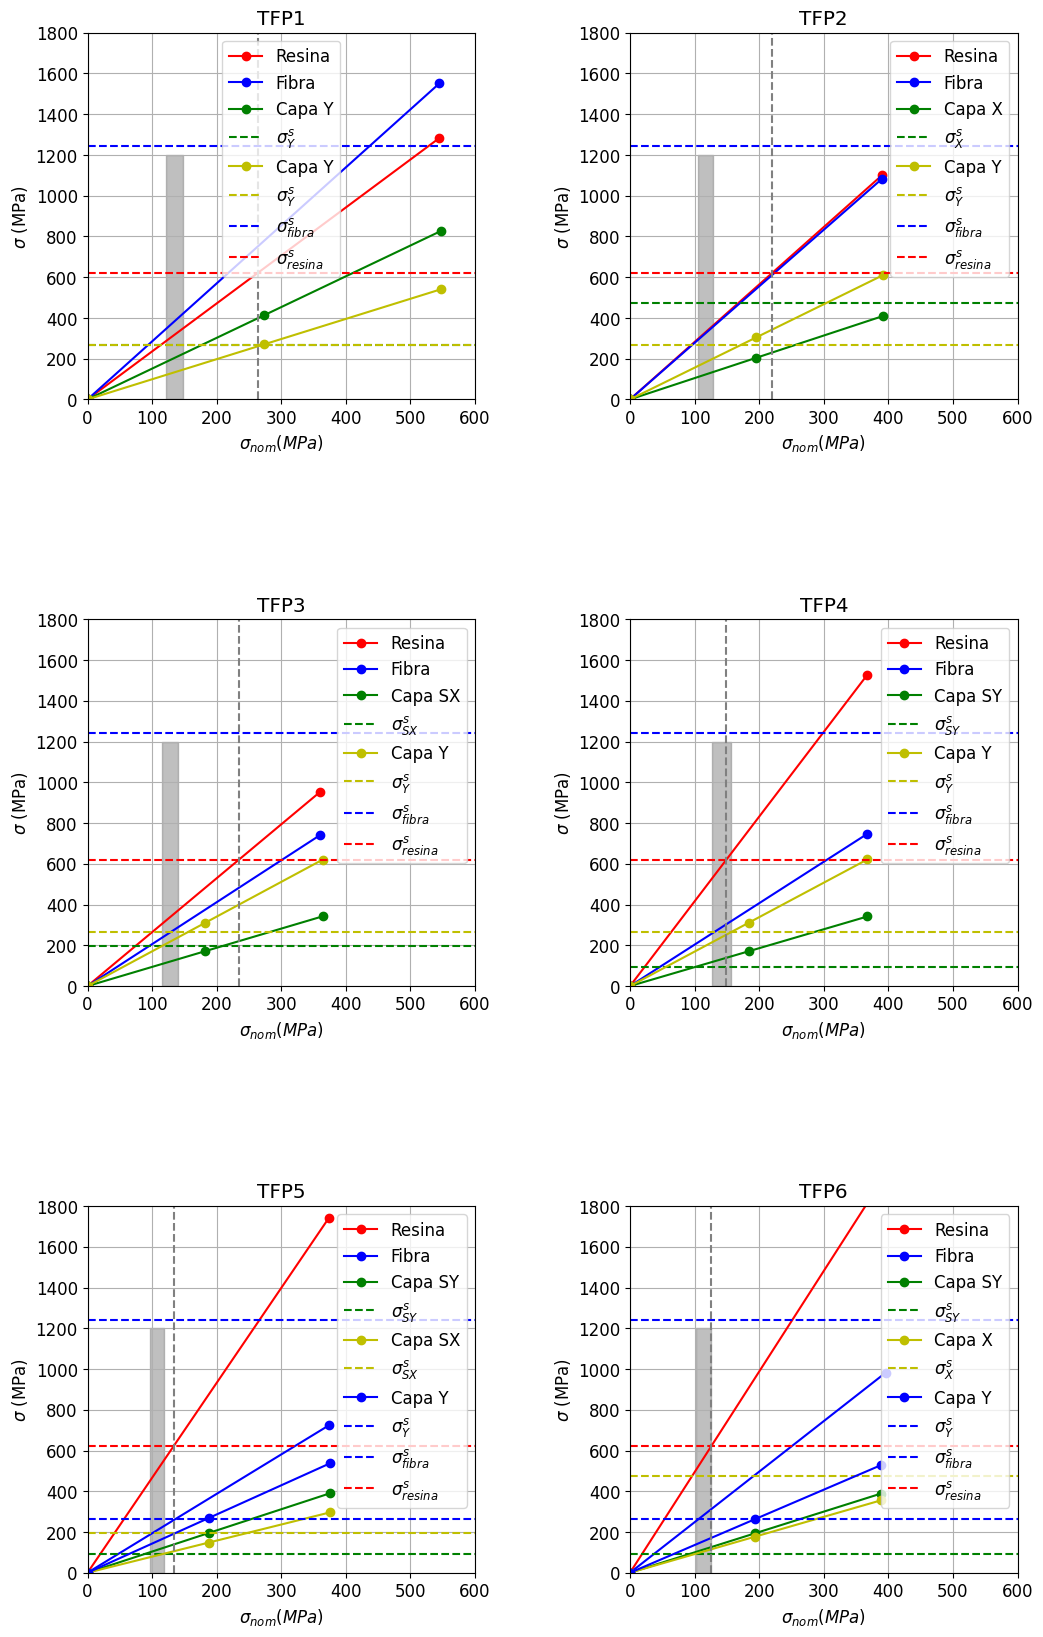

In [56]:
fig = plt.figure(figsize=(12,20))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)

ncapas = [2,2,2,2,3,3]
colors = ["g","y","b","r","c","m"]
for i in range(6):

    isum = summaries_multicapa[i]
    layers = isum["layers"]
    P1 = isum["P1"]
    plt.subplot(3,2,i+1)
    plt.plot([0,sigma_exp[i]], [0,P1_resina[i]], "o-", label="Resina",color="r")
    plt.plot([0,sigma_exp[i]], [0,P1_max[i]], "o-", label="Fibra",color="b")

    sigma_exp_mc = isum["sigma_exp"]
    for j in range(ncapas[i]):
        plt.plot(sigma_exp_mc, P1[j], "o-", label="Capa "+layers[j],color=colors[j])
        # horizontal line
        plt.axhline(y=St_layers[layers[j]], linestyle='--', label=r"$\sigma_{"+layers[j]+"}^s$",
                    color=colors[j])


    # horizontal line
    plt.axhline(y=Sfibre, linestyle='--', label="$\sigma_{fibra}^s$",
                color="b")
    plt.axhline(y=Smatrix, linestyle='--', label="$\sigma_{resina}^s$",
                color="r")

    # experimental vertical line
    # 10% rectangle vertical line
    plt.fill_betweenx([0, 1200], 
                      Sb_expiremental[i]-Sb_expiremental[i]*0.1, 
                      Sb_expiremental[i]+Sb_expiremental[i]*0.1, 
                      color="gray", alpha=0.5)
    
    # vertical line
    plt.axvline(x=S_TPFi_old[i], linestyle='--', color="gray")
    plt.ylabel(r"$\sigma$ (MPa)")
    plt.xlabel(r"$\sigma_{nom} (MPa)$")
    plt.grid()
    plt.title("TFP" + str(i+1))
    plt.ylim(0, 1800)
    plt.xlim(0, 600)
    plt.legend()

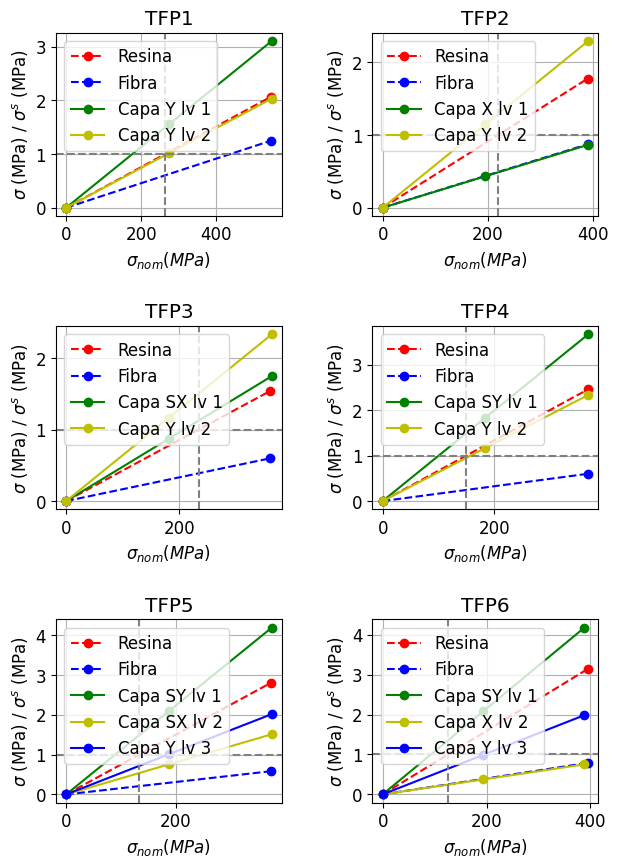

In [57]:
fig = plt.figure(figsize=(7,10))
#padding between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.4)

ncapas = [2,2,2,2,3,3]
colors = ["g","y","b","r","c","m"]
for i in range(6):

    isum = summaries_multicapa[i]
    layers = isum["layers"]
    P1 = isum["P1"]
    plt.subplot(3,2,i+1)
    plt.plot([0,sigma_exp[i]], [0,P1_resina[i]/Smatrix], "o--", label="Resina",color="r")
    plt.plot([0,sigma_exp[i]], [0,P1_max[i]/Sfibre], "o--", label="Fibra",color="b")

    sigma_exp_mc = isum["sigma_exp"]
    for j in range(ncapas[i]):

        # damage = P1[j]/St_layers[layers[j]]
        damage = np.array([P1[j][k]/St_layers[layers[j]] for k in range(len(P1[j]))])
        plt.plot(sigma_exp_mc,damage,
                 "o-", label="Capa "+layers[j] + " lv " + str(j+1)
                 ,color=colors[j])


    
    # vertical line
    plt.axvline(x=S_TPFi_old[i], linestyle='--', color="gray")
    plt.ylabel(r"$\sigma$ (MPa) / $\sigma^s$ (MPa)")
    plt.xlabel(r"$\sigma_{nom} (MPa)$")
    plt.grid()
    plt.title("TFP" + str(i+1))

    ## draw 1 lines horizontal
    plt.axhline(y=1, linestyle='--', color="gray")

    plt.legend()

In [58]:
frds_files

['TPF1/output/main.frd',
 'TPF2/output/main.frd',
 'TPF3/output/main.frd',
 'TPF4/output/main.frd',
 'TPF5/output/main.frd',
 'TPF6/output/main.frd']

In [59]:
from djccx.inp.inp import inp 

inp_f = inp(frds_files[0].replace(".frd",".inp"))

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [60]:
resina = inp_f.select("RESINA","elset")

nodes = resina.GetUniqueNodes(inp_f)
indx_resina = nodes.index

ifrd_1 = ifrds[0]["data"].copy()
ifrd_1 = ifrd_1[ifrd_1["z"]<0]
ifrd_1 = ifrd_1[ifrd_1["x"]<5]
x_resina = ifrd_1["x"]
P1_resina = ifrd_1["P1"]

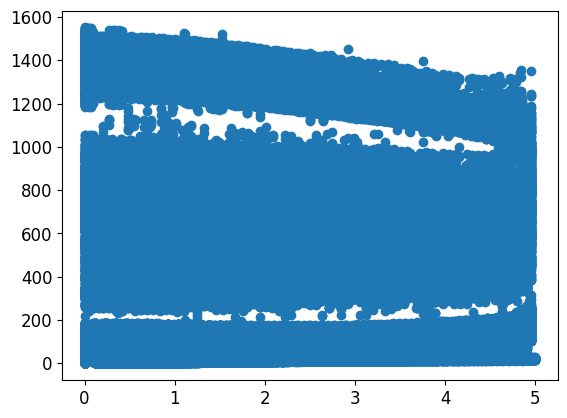

In [61]:
plt.plot(x_resina, P1_resina, "o")